In [10]:
# -*- coding: utf-8 -*-
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K

EPISODES = 1000


class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.99
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _huber_loss(self, target, prediction):
        # sqrt(1+error^2)-1
        error = prediction - target
        return K.mean(K.sqrt(1+K.square(error))-1, axis=-1)

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss=self._huber_loss,
                      optimizer=Adam(lr=self.learning_rate))
        return model

    def update_target_model(self):
        # copy weights from model to target_model
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(state)
            if done:
                target[0][action] = reward
            else:
                # a = self.model.predict(next_state)[0]
                t = self.target_model.predict(next_state)[0]
                target[0][action] = reward + self.gamma * np.amax(t)
                # target[0][action] = reward + self.gamma * t[np.argmax(a)]
            self.model.fit(state, target, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)


if __name__ == "__main__":
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)
    agent.load("./agent.h5")
    
    done = False
    batch_size = 32

    for e in range(EPISODES):
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        for time in range(500):
            # env.render()
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            reward = reward if not done else -10
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                agent.update_target_model()
                print("episode: {}/{}, score: {}, e: {:.2}"
                      .format(e, EPISODES, time, agent.epsilon))
                break
        if len(agent.memory) > batch_size:
            agent.replay(batch_size)
    
    agent.save('./agent.h5')

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
episode: 0/1000, score: 39, e: 1.0
episode: 1/1000, score: 14, e: 0.99
episode: 2/1000, score: 19, e: 0.98
episode: 3/1000, score: 20, e: 0.97
episode: 4/1000, score: 14, e: 0.96
episode: 5/1000, score: 8, e: 0.95
episode: 6/1000, score: 35, e: 0.94
episode: 7/1000, score: 13, e: 0.93
episode: 8/1000, score: 27, e: 0.92
episode: 9/1000, score: 15, e: 0.91
episode: 10/1000, score: 29, e: 0.9
episode: 11/1000, score: 28, e: 0.9
episode: 12/1000, score: 24, e: 0.89
episode: 13/1000, score: 24, e: 0.88
episode: 14/1000, score: 30, e: 0.87
episode: 15/1000, score: 20, e: 0.86
episode: 16/1000, score: 17, e: 0.85
episode: 17/1000, score: 21, e: 0.84
episode: 18/1000, score: 18, e: 0.83
episode: 19/1000, score: 16, e: 0.83
episode: 20/1000, score: 26, e: 0.82
episode: 21/1000, score: 67, e: 0.81
episode: 22/1000, score: 29, e: 0.8
episode: 23/1000, score: 36, e: 0.79
episode: 24/1000, score: 35, 

episode: 213/1000, score: 138, e: 0.12
episode: 214/1000, score: 168, e: 0.12
episode: 215/1000, score: 124, e: 0.12
episode: 216/1000, score: 290, e: 0.11
episode: 217/1000, score: 132, e: 0.11
episode: 218/1000, score: 353, e: 0.11
episode: 219/1000, score: 322, e: 0.11
episode: 220/1000, score: 139, e: 0.11
episode: 221/1000, score: 325, e: 0.11
episode: 222/1000, score: 139, e: 0.11
episode: 223/1000, score: 163, e: 0.11
episode: 224/1000, score: 137, e: 0.11
episode: 225/1000, score: 175, e: 0.1
episode: 226/1000, score: 282, e: 0.1
episode: 227/1000, score: 222, e: 0.1
episode: 228/1000, score: 216, e: 0.1
episode: 229/1000, score: 130, e: 0.1
episode: 230/1000, score: 124, e: 0.099
episode: 231/1000, score: 200, e: 0.098
episode: 232/1000, score: 115, e: 0.097
episode: 233/1000, score: 110, e: 0.096
episode: 234/1000, score: 225, e: 0.095
episode: 235/1000, score: 133, e: 0.094
episode: 236/1000, score: 137, e: 0.093
episode: 237/1000, score: 94, e: 0.092
episode: 238/1000, scor

episode: 420/1000, score: 110, e: 0.015
episode: 421/1000, score: 169, e: 0.015
episode: 422/1000, score: 11, e: 0.014
episode: 423/1000, score: 97, e: 0.014
episode: 424/1000, score: 133, e: 0.014
episode: 425/1000, score: 102, e: 0.014
episode: 426/1000, score: 148, e: 0.014
episode: 427/1000, score: 117, e: 0.014
episode: 428/1000, score: 295, e: 0.014
episode: 429/1000, score: 93, e: 0.013
episode: 430/1000, score: 323, e: 0.013
episode: 431/1000, score: 101, e: 0.013
episode: 432/1000, score: 185, e: 0.013
episode: 433/1000, score: 131, e: 0.013
episode: 434/1000, score: 125, e: 0.013
episode: 435/1000, score: 93, e: 0.013
episode: 436/1000, score: 92, e: 0.013
episode: 437/1000, score: 119, e: 0.012
episode: 438/1000, score: 263, e: 0.012
episode: 439/1000, score: 91, e: 0.012
episode: 440/1000, score: 111, e: 0.012
episode: 441/1000, score: 499, e: 0.012
episode: 442/1000, score: 152, e: 0.012
episode: 443/1000, score: 139, e: 0.012
episode: 444/1000, score: 251, e: 0.012
episod

episode: 623/1000, score: 192, e: 0.0099
episode: 624/1000, score: 252, e: 0.0099
episode: 625/1000, score: 117, e: 0.0099
episode: 626/1000, score: 109, e: 0.0099
episode: 627/1000, score: 135, e: 0.0099
episode: 628/1000, score: 113, e: 0.0099
episode: 629/1000, score: 182, e: 0.0099
episode: 630/1000, score: 120, e: 0.0099
episode: 631/1000, score: 144, e: 0.0099
episode: 632/1000, score: 156, e: 0.0099
episode: 633/1000, score: 90, e: 0.0099
episode: 634/1000, score: 81, e: 0.0099
episode: 635/1000, score: 174, e: 0.0099
episode: 636/1000, score: 77, e: 0.0099
episode: 637/1000, score: 114, e: 0.0099
episode: 638/1000, score: 121, e: 0.0099
episode: 639/1000, score: 129, e: 0.0099
episode: 640/1000, score: 109, e: 0.0099
episode: 641/1000, score: 99, e: 0.0099
episode: 642/1000, score: 261, e: 0.0099
episode: 643/1000, score: 113, e: 0.0099
episode: 644/1000, score: 195, e: 0.0099
episode: 645/1000, score: 83, e: 0.0099
episode: 646/1000, score: 211, e: 0.0099
episode: 647/1000, sc

episode: 824/1000, score: 218, e: 0.0099
episode: 825/1000, score: 169, e: 0.0099
episode: 826/1000, score: 126, e: 0.0099
episode: 827/1000, score: 149, e: 0.0099
episode: 828/1000, score: 158, e: 0.0099
episode: 829/1000, score: 326, e: 0.0099
episode: 830/1000, score: 127, e: 0.0099
episode: 831/1000, score: 84, e: 0.0099
episode: 832/1000, score: 122, e: 0.0099
episode: 833/1000, score: 324, e: 0.0099
episode: 834/1000, score: 202, e: 0.0099
episode: 835/1000, score: 426, e: 0.0099
episode: 836/1000, score: 499, e: 0.0099
episode: 837/1000, score: 326, e: 0.0099
episode: 838/1000, score: 346, e: 0.0099
episode: 839/1000, score: 253, e: 0.0099
episode: 840/1000, score: 281, e: 0.0099
episode: 841/1000, score: 182, e: 0.0099
episode: 842/1000, score: 266, e: 0.0099
episode: 843/1000, score: 187, e: 0.0099
episode: 844/1000, score: 232, e: 0.0099
episode: 845/1000, score: 439, e: 0.0099
episode: 846/1000, score: 247, e: 0.0099
episode: 847/1000, score: 364, e: 0.0099
episode: 848/1000

354


<IPython.core.display.Javascript object>


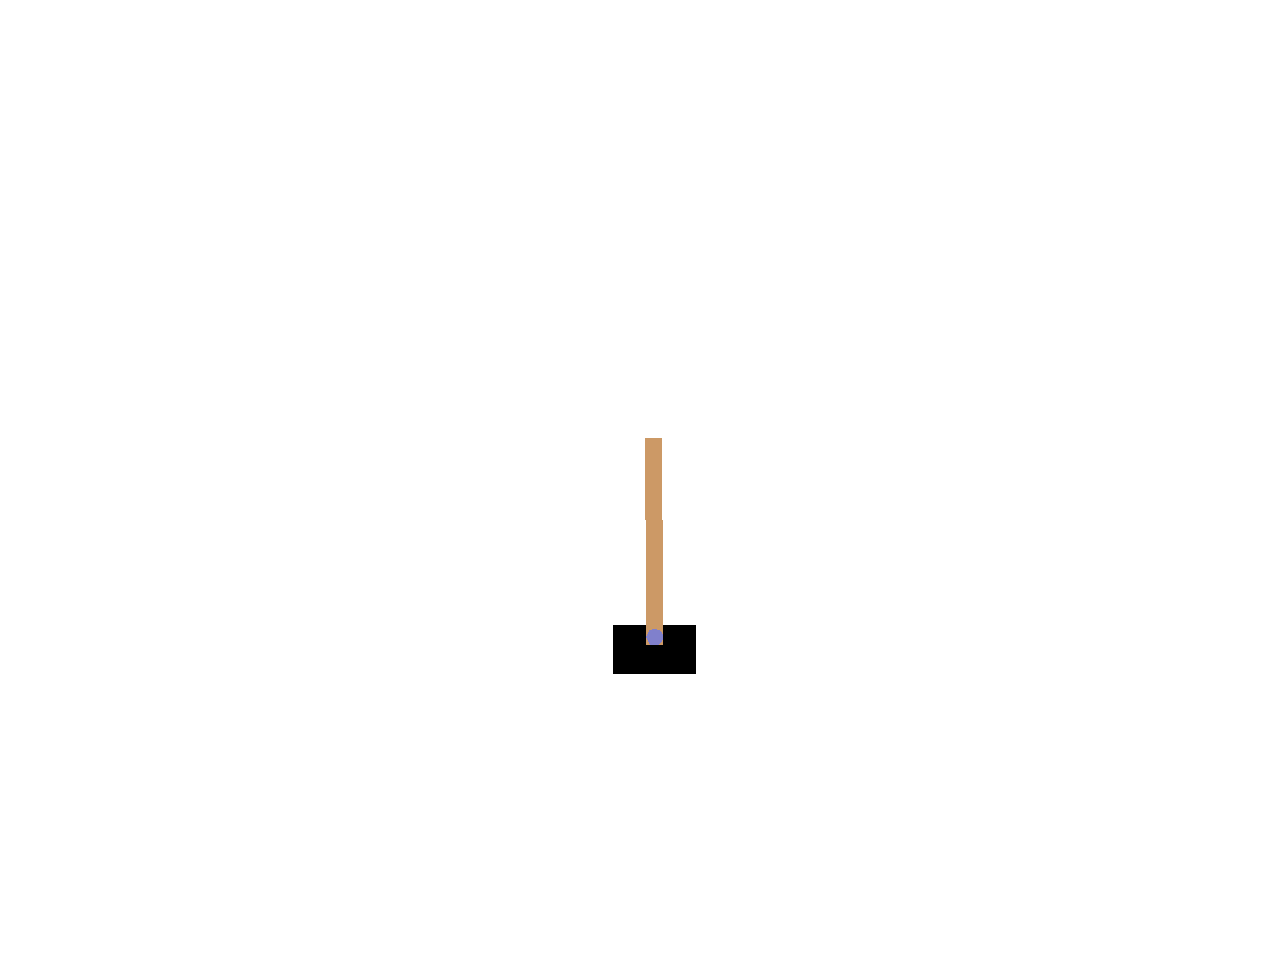

In [14]:
from matplotlib import animation
from matplotlib import pyplot as plt
%matplotlib nbagg

state = env.reset()

steps = 0

frames = []

while True:
    action = np.argmax(agent.model.predict(state.reshape(1, 4))[0])
    state, reward, done, info = env.step(action)    
    
    frames.append(env.render(mode='rgb_array'))
        
    steps += 1
    
    if done:
        break
    
print(steps)


fig = plt.gcf()
patch = plt.imshow(frames[0])
plt.axis('off')


def animate(i):
    patch.set_data(frames[i])

anim = animation.FuncAnimation(fig, animate, frames = len(frames), interval=50)
